# <span style="color:royalblue"> [2주차] 매크로 경제 분석</span> <img src="./data/logo.png" style="width: 120px;" align="right">
# 2022 미국과 한국 주택가격지수 비교 분석 

--- 

<div style="text-align: right"> Final Edition : 2022.10.25<br>
    copyrightⓒ 2022 All rights reserved by Data Lover Pablo </div>

# 1. 미국과 한국의 주택가격지수 비교

## 1.1 미국 주택 가격지수 데이터

### 1.1.1 FRED(Federal Reserve Bank of St. Louis) 미국 연방준비은행 연구소 제공 데이터 수집
* 지수명 : All-Transactions House Price Index for the United States 
* Ticker : USSTHPI
* 기준년월 : 1980.1Q 지수 = 100
* 업데이트 주기 : 2022년 8월 30일에 2022 2Q 데이터 업데이트
* 데이터 링크 : https://fred.stlouisfed.org/series/USSTHPI

<img src="./data/FRED.JPG" alt="Drawing" style="width: 1000px;"/>

In [152]:
# 필요한 패키지 및 모듈 불러오기

import pandas as pd
import numpy as np

from datetime import datetime, timedelta # 시간과 날짜 간 차이 계산

parse : 파싱은 어떤 페이지(문서, html 등)에서 내가 원하는 데이터를 특정 패턴이나 순서로 추출해 가공하는 것을 말합니다.  

### 1.1.2 데이터 불러오기

In [153]:
# House_Price_Index_US
df_us = pd.read_csv('./data/USSTHPI_2022.csv')
df_us

,DATE,USSTHPI
0,1975-01-01,60.03
1,1975-04-01,60.98
2,1975-07-01,61.14
3,1975-10-01,62.22
4,1976-01-01,62.85
...,...,...
185,2021-04-01,511.17
186,2021-07-01,539.60
187,2021-10-01,558.07
188,2022-01-01,578.58


In [154]:
# 데이터 타입 확인
df_us.dtypes

# 현재 날짜는 문자열, 지수는 정수 타입입니다.

DATE        object
USSTHPI    float64
dtype: object

In [155]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     190 non-null    object 
 1   USSTHPI  190 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


### 1.1.3 데이터 타입 변경(시계열)

In [156]:
df_us['DATE']

0      1975-01-01
1      1975-04-01
2      1975-07-01
3      1975-10-01
4      1976-01-01
          ...    
185    2021-04-01
186    2021-07-01
187    2021-10-01
188    2022-01-01
189    2022-04-01
Name: DATE, Length: 190, dtype: object

In [157]:
# 문자열로 되어 있는 칼럼을 날짜타입으로 변경해줍니다. convert the 'Date' column to datetime format
df_us['DATE']= pd.to_datetime(df_us['DATE'])
 
# Check the format of 'Date' column
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     190 non-null    datetime64[ns]
 1   USSTHPI  190 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


In [158]:
df_us.shape

(190, 2)

### 1.1.4 미국 주택 가격지수 시각화

rc 파라미터 설정 : [matplotlib 공식 다큐먼트](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rc.html)

<AxesSubplot:xlabel='DATE'>

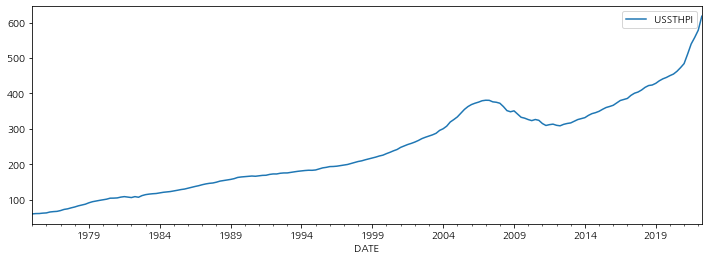

In [9]:
import matplotlib.pyplot as plt
# import datetime as dt

plt.rc('figure', figsize=(12, 4))
plt.rc('font', family='NanumGothic')

# x축에 날짜, y축에 지수를 넣고 간단히 그려봅니다.
df_us.plot('DATE', 'USSTHPI')

In [10]:
# 리스트 [ ,   ,   ,]
df_us['DATE'].to_list()

[Timestamp('1975-01-01 00:00:00'),
 Timestamp('1975-04-01 00:00:00'),
 Timestamp('1975-07-01 00:00:00'),
 Timestamp('1975-10-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1978-01-01 00:00:00'),
 Timestamp('1978-04-01 00:00:00'),
 Timestamp('1978-07-01 00:00:00'),
 Timestamp('1978-10-01 00:00:00'),
 Timestamp('1979-01-01 00:00:00'),
 Timestamp('1979-04-01 00:00:00'),
 Timestamp('1979-07-01 00:00:00'),
 Timestamp('1979-10-01 00:00:00'),
 Timestamp('1980-01-01 00:00:00'),
 Timestamp('1980-04-01 00:00:00'),
 Timestamp('1980-07-01 00:00:00'),
 Timestamp('1980-10-01 00:00:00'),
 Timestamp('1981-01-01 00:00:00'),
 Timestamp('1981-04-01 00:00:00'),
 Timestamp('1981-07-01 00:00:00'),
 Timestamp('1981-10-01 00:00:00'),
 Timestamp('1982-01-

In [11]:
import datetime as dt
xlabels = df_us['DATE'].dt.year.to_list() # 1975, 1975,1975, 1975, 1976....
xlabels

[1975,
 1975,
 1975,
 1975,
 1976,
 1976,
 1976,
 1976,
 1977,
 1977,
 1977,
 1977,
 1978,
 1978,
 1978,
 1978,
 1979,
 1979,
 1979,
 1979,
 1980,
 1980,
 1980,
 1980,
 1981,
 1981,
 1981,
 1981,
 1982,
 1982,
 1982,
 1982,
 1983,
 1983,
 1983,
 1983,
 1984,
 1984,
 1984,
 1984,
 1985,
 1985,
 1985,
 1985,
 1986,
 1986,
 1986,
 1986,
 1987,
 1987,
 1987,
 1987,
 1988,
 1988,
 1988,
 1988,
 1989,
 1989,
 1989,
 1989,
 1990,
 1990,
 1990,
 1990,
 1991,
 1991,
 1991,
 1991,
 1992,
 1992,
 1992,
 1992,
 1993,
 1993,
 1993,
 1993,
 1994,
 1994,
 1994,
 1994,
 1995,
 1995,
 1995,
 1995,
 1996,
 1996,
 1996,
 1996,
 1997,
 1997,
 1997,
 1997,
 1998,
 1998,
 1998,
 1998,
 1999,
 1999,
 1999,
 1999,
 2000,
 2000,
 2000,
 2000,
 2001,
 2001,
 2001,
 2001,
 2002,
 2002,
 2002,
 2002,
 2003,
 2003,
 2003,
 2003,
 2004,
 2004,
 2004,
 2004,
 2005,
 2005,
 2005,
 2005,
 2006,
 2006,
 2006,
 2006,
 2007,
 2007,
 2007,
 2007,
 2008,
 2008,
 2008,
 2008,
 2009,
 2009,
 2009,
 2009,
 2010,
 2010,
 2010,

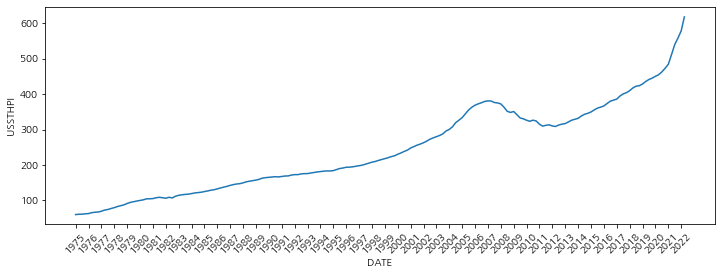

In [12]:
xs      = df_us['DATE'].to_list()
xlabels = df_us['DATE'].dt.year.to_list() # 1975, 1975,1975, 1975, 1976....

ys      = df_us['USSTHPI'].to_list()

plt.plot(xs, ys)

plt.xticks(ticks=xs, labels=xlabels, rotation=45)
plt.xlabel('DATE')
plt.ylabel('USSTHPI')

plt.locator_params(axis='x', nbins=len(xlabels)/4)

In [13]:
x=df_us['DATE'].dt.year
x

0      1975
1      1975
2      1975
3      1975
4      1976
       ... 
185    2021
186    2021
187    2021
188    2022
189    2022
Name: DATE, Length: 190, dtype: int64

## 1.2 한국 공동주택 가격지수 데이터 수집

### 1.2.1 KOSIS 국가통계포털 제공 데이터 수집
* 지수명 : 공동주택 통합 매매 실거래가격지수 (한국부동산원. 2017.11 = 100) cf. 종합주택매매가격지수(2021.6 지수 = 100) 
* 기준년월 : 2017.11 지수 - 100 (2021.6 지수 = 100)
* 수집방법 : 지수산정기간 중 거래신고가 2번 이상 있는 동일 아파트의 가격변동률과 거래량으로 지수 산출
* 조사기관 : [한국부동산원](http://www.r-one.co.kr/rone/resis/statistics/statisticsViewer.do?menuId=HOUSE_21111)
* 제공링크 : https://kosis.kr/statHtml/statHtml.do?orgId=408&tblId=DT_KAB_11672_S13&conn_path=I2
* 다운로드 : 1) 항목탭 : "지수" 선택  2) 행정구역별탭 : "전국" 선택  3) 시점탭 : 2006.01 ~ 2021.06 선택  4) 통계표 조회 버튼 클릭
5) 행렬전환 6) 다운로드 버튼 클릭   7) CSV 파일로 저장하고 경로설정

### 1.2.2 데이터 불러오기

In [14]:
# 경고메세지 삭제
import warnings
warnings.simplefilter("ignore")

# 한국 공동주택 매매가격지수 불러오기
df_kr = pd.read_excel('./data/공동주택_통합_매매_실거래가격지수_20220919162854.xlsx', engine='openpyxl')
df_kr

,시점,전국
0,시점,지수 (2017.11 = 100.0)
1,2006.01,60.3
2,2006.02,60.8
3,2006.03,61.5
4,2006.04,62
...,...,...
194,2022.02,135
195,2022.03,135.7
196,2022.04,136.8
197,2022.05,136.1


In [15]:
# 1번째 행부터 끝행 까지 데이터를 추출
df_kr = df_kr[1::]

In [16]:
df_kr

,시점,전국
1,2006.01,60.3
2,2006.02,60.8
3,2006.03,61.5
4,2006.04,62
5,2006.05,62.6
...,...,...
194,2022.02,135
195,2022.03,135.7
196,2022.04,136.8
197,2022.05,136.1


In [17]:
df_us['DATE']

0     1975-01-01
1     1975-04-01
2     1975-07-01
3     1975-10-01
4     1976-01-01
         ...    
185   2021-04-01
186   2021-07-01
187   2021-10-01
188   2022-01-01
189   2022-04-01
Name: DATE, Length: 190, dtype: datetime64[ns]

In [18]:
df_kr['시점']

1      2006.01
2      2006.02
3      2006.03
4      2006.04
5      2006.05
        ...   
194    2022.02
195    2022.03
196    2022.04
197    2022.05
198    2022.06
Name: 시점, Length: 198, dtype: object

In [19]:
# 2가지 문제점 발생.
# 1. 데이터 타입이 object
# 2. 미국은 2021-04-01 이고, 한국은 2006.01 으로 표현이 다릅니다.

# 한국 공동주택 매매가격지수의 시점 칼럼의 데이터 타입도 마찬가지로 문자열 -> datetime으로 변환해주어야 합니다.

In [20]:
# pd.to_datetime(df_us['DATE'])

### 1.2.3 데이터 타입 변경(시계열)

In [19]:
# 시리즈(Series) 데이터를 시계열로 변환하는 방법
pd.to_datetime(df_kr['시점']) 

1     2006-01-01
2     2006-02-01
3     2006-03-01
4     2006-04-01
5     2006-05-01
         ...    
194   2022-02-01
195   2022-03-01
196   2022-04-01
197   2022-05-01
198   2022-06-01
Name: 시점, Length: 198, dtype: datetime64[ns]

In [22]:
# 잘못된 예
# df_kr['시점'].to_datetime
# >>> 'Series' object has no attribute 'to_datetime'

In [159]:
import warnings
warnings.filterwarnings("ignore")

# to_datetime() 함수는 inplace = True 라는 인자가 없습니다.

df_us['Time'] = pd.to_datetime(df_us['DATE'])
df_kr['Time'] = pd.to_datetime(df_kr['시점'])

In [21]:
df_kr

,시점,전국,Time
1,2006.01,60.3,2006-01-01
2,2006.02,60.8,2006-02-01
3,2006.03,61.5,2006-03-01
4,2006.04,62,2006-04-01
5,2006.05,62.6,2006-05-01
...,...,...,...
194,2022.02,135,2022-02-01
195,2022.03,135.7,2022-03-01
196,2022.04,136.8,2022-04-01
197,2022.05,136.1,2022-05-01


### [참고 Tutorial] 데이터 추출하기 : iloc와 loc 차이

1. iloc  
integer location의 약어. 데이터프레임의 행이나 칼럼을 순서를 index(정수값)으로 추출하는 방식
df.iloc[행 인덱스, 열 인덱스]

2. loc  
loc는 칼럼명을 직접 적거나 특정조건식을 써서 사람이 읽기 편하게 데이터에 접근
df.loc[행 이름, 열 이름]

[pandas 공식 튜토리얼](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)

In [22]:
df_kr.iloc[0]

시점                  2006.01
전국                     60.3
Time    2006-01-01 00:00:00
Name: 1, dtype: object

In [23]:
df_kr.loc[1]

시점                  2006.01
전국                     60.3
Time    2006-01-01 00:00:00
Name: 1, dtype: object

In [24]:
#loc 행이름 열이름
df_kr.loc[1]['전국']

60.3

In [160]:
df_us['Time']

0     1975-01-01
1     1975-04-01
2     1975-07-01
3     1975-10-01
4     1976-01-01
         ...    
185   2021-04-01
186   2021-07-01
187   2021-10-01
188   2022-01-01
189   2022-04-01
Name: Time, Length: 190, dtype: datetime64[ns]

In [26]:
df_kr['Time']

1     2006-01-01
2     2006-02-01
3     2006-03-01
4     2006-04-01
5     2006-05-01
         ...    
194   2022-02-01
195   2022-03-01
196   2022-04-01
197   2022-05-01
198   2022-06-01
Name: Time, Length: 198, dtype: datetime64[ns]

## 1.3 한국 데이터와 미국 데이터 병합(Merge)

### 1.3.1 pd.merge_asof 함수
Time-series friendly merging

* pandas는 시계열 데이터 프레임을 합 칠수 있는 특별할 함수를 제공합니다.
* 완전히 일치하는 키 대신에 direction='nearest' 가장 근접한 키를 기반으로 하는 점을 제외하면 left-join과 유사합니다.
* 좌측 데이터 프레임의 각 행에 대해, 좌측 프레임의 키보다 적은 우측 프레임에서 최종 행을 선택합니다.

In [27]:
df_merged = pd.merge_asof(
    df_us, df_kr,
    on='Time', direction='nearest')

In [28]:
df_merged 

,DATE,USSTHPI,Time,시점,전국
0,1975-01-01,60.03,1975-01-01,2006.01,60.3
1,1975-04-01,60.98,1975-04-01,2006.01,60.3
2,1975-07-01,61.14,1975-07-01,2006.01,60.3
3,1975-10-01,62.22,1975-10-01,2006.01,60.3
4,1976-01-01,62.85,1976-01-01,2006.01,60.3
...,...,...,...,...,...
185,2021-04-01,511.17,2021-04-01,2021.04,124.2
186,2021-07-01,539.60,2021-07-01,2021.07,130.8
187,2021-10-01,558.07,2021-10-01,2021.10,137
188,2022-01-01,578.58,2022-01-01,2022.01,135.4


In [29]:
# 시점(Time)이 정확히 일치하는 값만 병합해줍니다.

df_merged = pd.merge_asof(
    df_us.sort_values(by='Time'), df_kr.sort_values(by='Time'),
    on='Time', allow_exact_matches=True)

In [30]:
df_merged

,DATE,USSTHPI,Time,시점,전국
0,1975-01-01,60.03,1975-01-01,NaN,NaN
1,1975-04-01,60.98,1975-04-01,NaN,NaN
2,1975-07-01,61.14,1975-07-01,NaN,NaN
3,1975-10-01,62.22,1975-10-01,NaN,NaN
4,1976-01-01,62.85,1976-01-01,NaN,NaN
...,...,...,...,...,...
185,2021-04-01,511.17,2021-04-01,2021.04,124.2
186,2021-07-01,539.60,2021-07-01,2021.07,130.8
187,2021-10-01,558.07,2021-10-01,2021.10,137
188,2022-01-01,578.58,2022-01-01,2022.01,135.4


## 1.4 결측치 처리

In [31]:
df_merged.isnull()

,DATE,USSTHPI,Time,시점,전국
0,False,False,False,True,True
1,False,False,False,True,True
2,False,False,False,True,True
3,False,False,False,True,True
4,False,False,False,True,True
...,...,...,...,...,...
185,False,False,False,False,False
186,False,False,False,False,False
187,False,False,False,False,False
188,False,False,False,False,False


### 1.4.1 결측치 시각화

In [32]:
!pip install missingno

<AxesSubplot:>

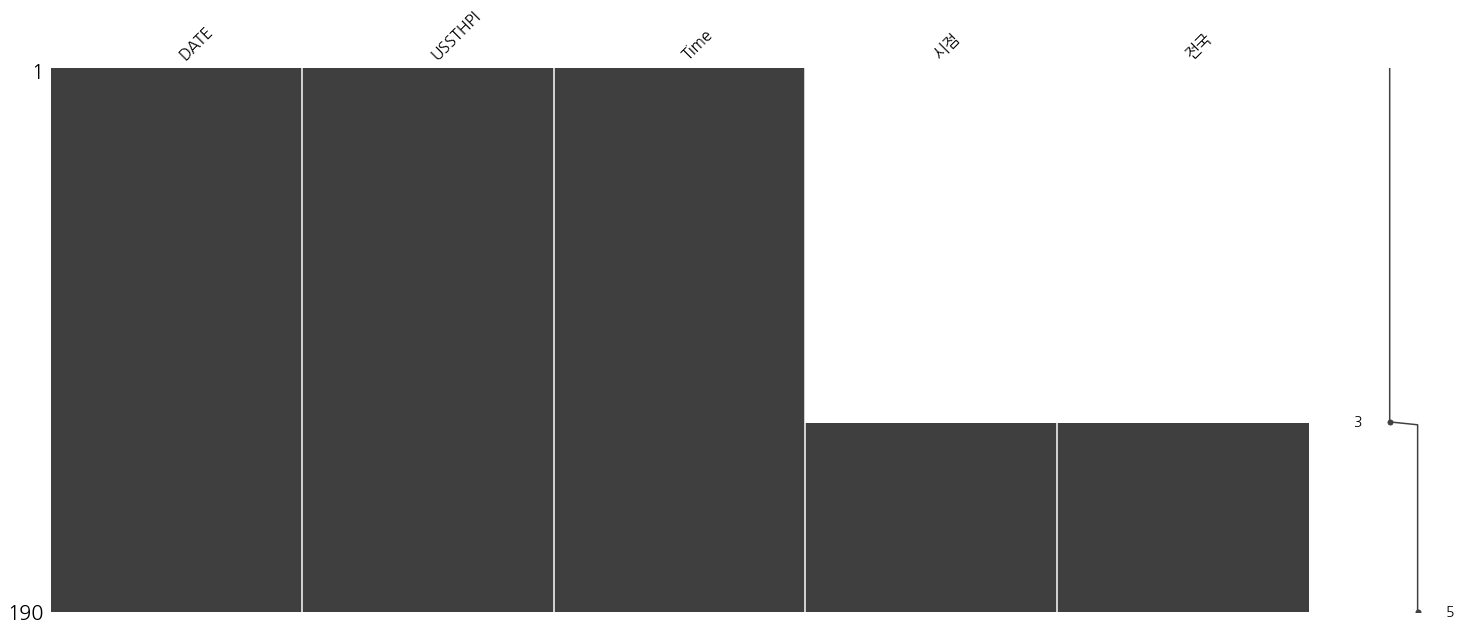

In [33]:
# !pip install missingno 
# 패키지를 설치해주세요

import missingno as msno

# %matplotlib inline # notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해줍니다.
plt.rc('font', family = 'NanumGothic')
msno.matrix(df_merged)

In [35]:
# msno.dendrogram(df_merged)
# msno.heatmap(df_merged)
# msno.bar(df_merged)

In [34]:
df_merged.isnull().sum()

DATE         0
USSTHPI      0
Time         0
시점         124
전국         124
dtype: int64

### 1.4.2 결측치 제거

In [35]:
# axis = 0 은 기본값으로 행 방향(가로). axis=1 은 열 방향(세로) 입니다.
df_merged.dropna(axis=0) 

,DATE,USSTHPI,Time,시점,전국
124,2006-01-01,368.73,2006-01-01,2006.01,60.3
125,2006-04-01,372.51,2006-04-01,2006.04,62
126,2006-07-01,375.57,2006-07-01,2006.07,63.5
127,2006-10-01,379.42,2006-10-01,2006.10,68.6
128,2007-01-01,380.83,2007-01-01,2007.01,73.9
...,...,...,...,...,...
185,2021-04-01,511.17,2021-04-01,2021.04,124.2
186,2021-07-01,539.60,2021-07-01,2021.07,130.8
187,2021-10-01,558.07,2021-10-01,2021.10,137
188,2022-01-01,578.58,2022-01-01,2022.01,135.4


## 1.5 데이터 전처리

In [36]:
# 중요한 데이터 타입을 확인해봅니다. 시점과 인덱스 값이 여전히 문자열(object)입니다.
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     190 non-null    datetime64[ns]
 1   USSTHPI  190 non-null    float64       
 2   Time     190 non-null    datetime64[ns]
 3   시점       66 non-null     object        
 4   전국       66 non-null     object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 8.9+ KB


### 1.5.1 데이터 타입 변경

In [37]:
# 전국의 주택가격지수의 데이터 타입을 문자에서 숫자로 바꿔줍니다.
df_merged['전국'] = df_merged['전국'].astype(np.float64)

In [38]:
df_merged['Time']

0     1975-01-01
1     1975-04-01
2     1975-07-01
3     1975-10-01
4     1976-01-01
         ...    
185   2021-04-01
186   2021-07-01
187   2021-10-01
188   2022-01-01
189   2022-04-01
Name: Time, Length: 190, dtype: datetime64[ns]

In [39]:
df_merged

,DATE,USSTHPI,Time,시점,전국
0,1975-01-01,60.03,1975-01-01,NaN,NaN
1,1975-04-01,60.98,1975-04-01,NaN,NaN
2,1975-07-01,61.14,1975-07-01,NaN,NaN
3,1975-10-01,62.22,1975-10-01,NaN,NaN
4,1976-01-01,62.85,1976-01-01,NaN,NaN
...,...,...,...,...,...
185,2021-04-01,511.17,2021-04-01,2021.04,124.2
186,2021-07-01,539.60,2021-07-01,2021.07,130.8
187,2021-10-01,558.07,2021-10-01,2021.10,137.0
188,2022-01-01,578.58,2022-01-01,2022.01,135.4


In [42]:
# 위에서 dropna를 했음에도 불구하고 NaN 값이 그대로 있습니다. 아래 inplace 개념을 알아두어야 합니다.

### [참고 Tutorial] dropna() 함수 : inplace 파라미터 와 reset_index 함수<br>
[pandas 공식 튜토리얼](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna)  
[R friend 블로그](https://rfriend.tistory.com/263)  
[wikidocs](https://wikidocs.net/136562)  

In [40]:
df_merged.dropna(inplace=True)
df_merged

,DATE,USSTHPI,Time,시점,전국
124,2006-01-01,368.73,2006-01-01,2006.01,60.3
125,2006-04-01,372.51,2006-04-01,2006.04,62.0
126,2006-07-01,375.57,2006-07-01,2006.07,63.5
127,2006-10-01,379.42,2006-10-01,2006.10,68.6
128,2007-01-01,380.83,2007-01-01,2007.01,73.9
...,...,...,...,...,...
185,2021-04-01,511.17,2021-04-01,2021.04,124.2
186,2021-07-01,539.60,2021-07-01,2021.07,130.8
187,2021-10-01,558.07,2021-10-01,2021.10,137.0
188,2022-01-01,578.58,2022-01-01,2022.01,135.4


In [41]:
# dropna() 함수에서 inplace = True 인자값은 기존의 값을 새로운 값으로 대체하라는 옵션
df_merged.dropna(inplace=True)
# df_merged = df_merged.dropna()


# reset_index() 함수에서 drop = True 인자값은 기존 인덱스 칼럼을 삭제하라는 옵션
df_merged.reset_index(drop=True, inplace=True)

In [42]:
df_merged

,DATE,USSTHPI,Time,시점,전국
0,2006-01-01,368.73,2006-01-01,2006.01,60.3
1,2006-04-01,372.51,2006-04-01,2006.04,62.0
2,2006-07-01,375.57,2006-07-01,2006.07,63.5
3,2006-10-01,379.42,2006-10-01,2006.10,68.6
4,2007-01-01,380.83,2007-01-01,2007.01,73.9
...,...,...,...,...,...
61,2021-04-01,511.17,2021-04-01,2021.04,124.2
62,2021-07-01,539.60,2021-07-01,2021.07,130.8
63,2021-10-01,558.07,2021-10-01,2021.10,137.0
64,2022-01-01,578.58,2022-01-01,2022.01,135.4


### 1.5.2 특정 칼럼 선택

In [43]:
df = df_merged[["Time", "USSTHPI", "전국"]]
df

,Time,USSTHPI,전국
0,2006-01-01,368.73,60.3
1,2006-04-01,372.51,62.0
2,2006-07-01,375.57,63.5
3,2006-10-01,379.42,68.6
4,2007-01-01,380.83,73.9
...,...,...,...
61,2021-04-01,511.17,124.2
62,2021-07-01,539.60,130.8
63,2021-10-01,558.07,137.0
64,2022-01-01,578.58,135.4


### 1.5.3 칼럼 이름 설정

In [44]:
df.columns

Index(['Time', 'USSTHPI', '전국'], dtype='object')

In [45]:
df.columns = ["Time", "US", "KR"]
df

,Time,US,KR
0,2006-01-01,368.73,60.3
1,2006-04-01,372.51,62.0
2,2006-07-01,375.57,63.5
3,2006-10-01,379.42,68.6
4,2007-01-01,380.83,73.9
...,...,...,...
61,2021-04-01,511.17,124.2
62,2021-07-01,539.60,130.8
63,2021-10-01,558.07,137.0
64,2022-01-01,578.58,135.4


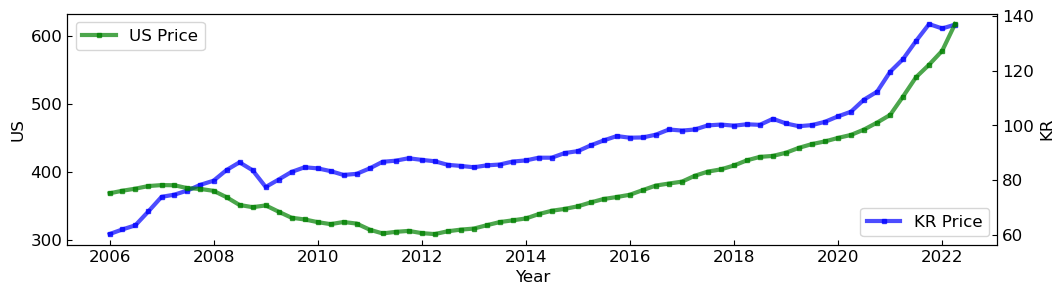

In [118]:
import matplotlib.pyplot as plt

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = df.Time #df.시점 # df['시점']
y1 = df.US
y2 = df.KR

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# y1 : 미국 인덱스에 대한 값
ax1.plot(x, y1, '-s', color='green', markersize=3, linewidth=3, alpha=0.7, label='US Price')

# ax1.set_ylim(300, 600)
ax1.set_xlabel('Year')
ax1.set_ylabel('US')
ax1.tick_params(axis='both', direction='in')

# y2 : 한국 인덱스에 대한 값
ax2 = ax1.twinx()
ax2.plot(x, y2, '-s', color='blue', markersize=3, linewidth=3, alpha=0.7, label='KR Price')

# ax2.bar(x, y2, color='deeppink', label='KR Price', alpha=0.7, width=30)
# ax2.set_ylim(40, 140)

ax2.set_ylabel('KR')
ax2.tick_params(axis='y', direction='in')

# set_zorder() 메서드는 z-축 방향의 순서를 지정합니다.
# 아래 그림과 같이 zorder가 낮을수록 먼저 그려지고(ax2 = 한국), zorder가 높을수록 나중에 그려집니다.(ax1 = 미국)

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.savefig('./data/US_VS_KR.png')

plt.show()

# [기준점 표준화] 데이터 분석 Check Point

-------------------------

## 기준시점에 대한 통일
 - 미국의 주택가격지수 기준시점 : 1980.1분기 = 100
 - 한국의 주택가격지수 기준시점 : 2017.11.1 = 100

미국과 한국의 주택가격지수의 기준시점이 다릅니다. 기준시점을 통일 시키고 다시 데이터 시각화를 통해 나타내어 보세요.

In [47]:
df_merged[(df_merged['전국']>99) & (df_merged['전국']<101)]

,DATE,USSTHPI,Time,시점,전국
46,2017-07-01,400.67,2017-07-01,2017.07,100.0
47,2017-10-01,404.00,2017-10-01,2017.10,100.3
48,2018-01-01,409.71,2018-01-01,2018.01,99.9
49,2018-04-01,417.26,2018-04-01,2018.04,100.4
50,2018-07-01,422.35,2018-07-01,2018.07,100.2
52,2019-01-01,428.52,2019-01-01,2019.01,100.7
53,2019-04-01,435.66,2019-04-01,2019.04,99.7
54,2019-07-01,441.19,2019-07-01,2019.07,100.1


In [48]:
base_point_KR = df_merged['전국'][df_merged['DATE']=='2017-07-01']
base_point_KR

46    100.0
Name: 전국, dtype: float64

In [49]:
base_point_US = np.float(df_merged['USSTHPI'][df_merged['DATE']=='2017-07-01'])
base_point_US

400.67

In [50]:
# 2017.7 = 100 기준인 US값을 400.67 로 나눠주고 100을 곱해 환산해줍니다.

df_merged['USSTHP(2017.7=100)'] = df_merged['USSTHPI'] / base_point_US * 100

In [51]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                66 non-null     datetime64[ns]
 1   USSTHPI             66 non-null     float64       
 2   Time                66 non-null     datetime64[ns]
 3   시점                  66 non-null     object        
 4   전국                  66 non-null     float64       
 5   USSTHP(2017.7=100)  66 non-null     float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 3.2+ KB


In [52]:
df_merged

,DATE,USSTHPI,Time,시점,전국,USSTHP(2017.7=100)
0,2006-01-01,368.73,2006-01-01,2006.01,60.3,92.028353
1,2006-04-01,372.51,2006-04-01,2006.04,62.0,92.971772
2,2006-07-01,375.57,2006-07-01,2006.07,63.5,93.735493
3,2006-10-01,379.42,2006-10-01,2006.10,68.6,94.696384
4,2007-01-01,380.83,2007-01-01,2007.01,73.9,95.048294
...,...,...,...,...,...,...
61,2021-04-01,511.17,2021-04-01,2021.04,124.2,127.578806
62,2021-07-01,539.60,2021-07-01,2021.07,130.8,134.674420
63,2021-10-01,558.07,2021-10-01,2021.10,137.0,139.284199
64,2022-01-01,578.58,2022-01-01,2022.01,135.4,144.403125


In [53]:
df_merged['USSTHP(2017.7=100)'] 

0      92.028353
1      92.971772
2      93.735493
3      94.696384
4      95.048294
         ...    
61    127.578806
62    134.674420
63    139.284199
64    144.403125
65    154.214191
Name: USSTHP(2017.7=100), Length: 66, dtype: float64

In [54]:
df_merged.dropna(inplace=True)

### 1.5.2 특정 칼럼 선택

In [55]:
df_new = df_merged[["Time", "USSTHP(2017.7=100)", "전국"]]
df_new

,Time,USSTHP(2017.7=100),전국
0,2006-01-01,92.028353,60.3
1,2006-04-01,92.971772,62.0
2,2006-07-01,93.735493,63.5
3,2006-10-01,94.696384,68.6
4,2007-01-01,95.048294,73.9
...,...,...,...
61,2021-04-01,127.578806,124.2
62,2021-07-01,134.674420,130.8
63,2021-10-01,139.284199,137.0
64,2022-01-01,144.403125,135.4


### 1.5.3 칼럼 이름 설정

In [56]:
df_new.columns = ["Time", "US", "KR"]
df_new

,Time,US,KR
0,2006-01-01,92.028353,60.3
1,2006-04-01,92.971772,62.0
2,2006-07-01,93.735493,63.5
3,2006-10-01,94.696384,68.6
4,2007-01-01,95.048294,73.9
...,...,...,...
61,2021-04-01,127.578806,124.2
62,2021-07-01,134.674420,130.8
63,2021-10-01,139.284199,137.0
64,2022-01-01,144.403125,135.4


# 1.6 미국과 한국 주택가격지수 시각화

### 1.6.1 데이터 병합 주택가격지수 그래프

In [57]:
df_new

,Time,US,KR
0,2006-01-01,92.028353,60.3
1,2006-04-01,92.971772,62.0
2,2006-07-01,93.735493,63.5
3,2006-10-01,94.696384,68.6
4,2007-01-01,95.048294,73.9
...,...,...,...
61,2021-04-01,127.578806,124.2
62,2021-07-01,134.674420,130.8
63,2021-10-01,139.284199,137.0
64,2022-01-01,144.403125,135.4


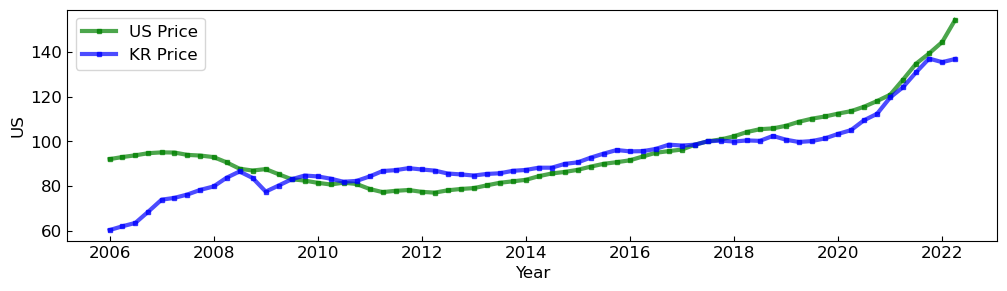

In [110]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = df_new.Time
y1 = df_new.US
y2 = df_new.KR

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# y1 : 미국 인덱스에 대한 값
ax1.plot(x, y1, '-s', color='green', markersize=3, linewidth=3, alpha=0.7, label='US Price')

# y2 : 한국 인덱스에 대한 값
ax1.plot(x, y2, '-s', color='blue', markersize=3, linewidth=3, alpha=0.7, label='KR Price')

ax1.set_xlabel('Year')
ax1.set_ylabel('US')
ax1.tick_params(axis='both', direction='in')

# set_zorder() 메서드는 z-축 방향의 순서를 지정합니다.
# 아래 그림과 같이 zorder가 낮을수록 먼저 그려지고(ax2 = 한국), zorder가 높을수록 나중에 그려집니다.(ax1 = 미국)

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
ax1.legend(loc='upper left')

plt.savefig('./data/US_VS_KR_100.png')

plt.show()

## 1.7 상관관계


*  <span style="color:royalblue">피어슨<br>
  - 상관관계에서 기본적으로 사용되는 상관계수<br>
  - 연속형변수의 상관관계 측정<br>
  - 모수 검정(parametric test)<br><br></span>

  
* 켄달
  - 켄달 상관계수(타우)
  - 변수값 대신 순위로 바꿔 이용(내신등급, 학점)
  - 비모수 검정(Non-parametric test)
  - sample size가 작을때. 데이터중 같은 값이 많을때 사용<br><br>
  
* 스피어만 
  - 스피어만 상관계수
  - 켄달과 동일한 순위기준 상관계수
  - 비모수 검정(Non-parametric test)
  - 데이터 내 편차와 이상치에 민감. 켄달보다 높은 상관관계 수치를 보임<br><br>

[피어슨, 켄달, 스피어만 차이점 수식](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/)

### 상관관계 정도
<img src="./data/상관관계정도.png" alt="Drawing" style="width: 400px;"/>

[요점정리]
1. 피어슨(Pearson) 상관계수는 두 수치형 변수 사이의 "선형" 관계를 평가합니다. 
2. 스피어만(Spearman) 상관계수는 원시 데이터가 아니라 각 변수에 대해 "순위" 를 매긴 값을 기반으로 합니다.<br>
   "순서형 변수" 가 포함된 관계를 평가하기 위해 사용됩니다.

In [59]:
# US_CS_M2.corr(method='pearson', min_periods=1)
df_new.corr(method='pearson', min_periods=1)

,US,KR
US,1.000000,0.819859
KR,0.819859,1.000000


[판다스 공식 튜토리얼 - pd.corr 상관계수](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr)

## 학습내용 정리요약
- 날짜, 시간데이터 Date and Time Data Types and Tools
- 타임시리즈 Time Series Basics  
<br>
- 결측치 시각화와 결측치 처리
- merge_asof() 함수 , 데이터 타입변경
- dropna(), reset_index() 함수와  inplace, drop 인자값
- 타임 시리즈 자료 플롯팅 Time Series Plotting
- 상관관계 correlation

# 2. 주요 선진국 주택 가격지수 데이터 수집 및 분석

[통계청 제공 국외통계작성기관](http://kostat.go.kr/portal/korea/kor_ko/7/4/2/index.action)

## 2.1 영국 주택 가격지수 데이터 <img src="./data/영국.png" alt="Drawing" style="width: 30px;" align="left">

### 2.1.1  영국 통계청(ONS : Office for National Statistics) 제공 데이터 수집
* 지수명 ; UK House Price Index 
* 경로 : Home > Economy > Inflation and price indices > UK House Price Index
* 제공데이터 : 평균 실거래가, 변동률 두가지 지표
* 제공기관 : 영국 통계청 https://www.ons.gov.uk/ (영국통계청은 영국 의회 직속인 독립적인 통계 기관입니다.)
* 데이터 링크 : [영국 주택가격 지수](https://www.ons.gov.uk/economy/inflationandpriceindices/bulletins/housepriceindex/october2021)

## 2.2 독일 주택 가격지수 데이터 <img src="./data/독일.jpg" alt="Drawing" style="width: 30px;" align="left">

### 2.2.1  독일 통계청(Statistisches Bundesamt) 제공 데이터 수집
* 지수명 ; House Price Index 
* 경로 : [Construction prices and real property prices](https://www-genesis.destatis.de/genesis//online?operation=table&code=61262-0001&bypass=true&levelindex=0&levelid=1633940589196#abreadcrumb)
* 제공데이터 : HOUSE PRICE INDEX(2015  = 100), 변동률 두가지 지표
* 제공기관 : 독일 통계청 https://www.destatis.de/DE/Home
* 데이터 링크 : [독일 주택가격 지수](https://www.destatis.de/EN/Press/2021/12/PE21_593_61262.html)

## 2.3 주요국의 주택가격지수 비교(FRED 데이터 제공)

[캐나다, 뉴질랜드, 홍콩, 영국 주택가격지수 비교](https://fredblog.stlouisfed.org/2017/12/houses-up-and-down/?utm_source=series_page&utm_medium=related_content&utm_term=related_resources&utm_campaign=fredblog)

# 3. 명목 주택가격 및 실질 주택가격 [각자 학습]

## 3.1 명목 주택가격 : 주택의 절대적인 가격

## 3.2 실질 주택가격 : 명목 주택가격 - 물가 상승률

### 과제
### M2 통화량

In [131]:
#M2 index_US
# House_Price_Index_US
# df_m2 = pd.read_csv('./data/MYAGM2USM052S.csv')
# df_m2

df_m = pd.read_csv('./data/M2.csv')
df_m

,DATE,M2
0,1980-11-03,1591.4
1,1980-11-10,1592.9
2,1980-11-17,1596.3
3,1980-11-24,1597.2
4,1980-12-01,1596.1
...,...,...
2096,2021-01-04,19039.8
2097,2021-01-11,19411.0
2098,2021-01-18,19425.0
2099,2021-01-25,19376.2


In [132]:
# 데이터 타입 확인
# df_m2.dtypes
df_m.dtypes

DATE     object
M2      float64
dtype: object

In [133]:
# 문자열로 되어 있는 칼럼을 날짜타입으로 변경해줍니다. convert the 'Date' column to datetime format
# df_m2['DATE']= pd.to_datetime(df_m2['DATE'])
df_m['DATE']= pd.to_datetime(df_m['DATE'])
# Check the format of 'Date' column
# df_m2.info()
df_m.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101 entries, 0 to 2100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2101 non-null   datetime64[ns]
 1   M2      2101 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.0 KB


In [134]:
# df_m2.shape
df_m.shape

(2101, 2)

In [70]:
#컬럼명 변경
# df_m2.columns=['DATE', 'M2']
# df_m2

,DATE,M2
0,1959-01-01,2.866000e+11
1,1959-02-01,2.877000e+11
2,1959-03-01,2.892000e+11
3,1959-04-01,2.901000e+11
4,1959-05-01,2.922000e+11
...,...,...
694,2016-11-01,1.314790e+13
695,2016-12-01,1.318090e+13
696,2017-01-01,1.326050e+13
697,2017-02-01,1.329930e+13


In [91]:
#M2 변수 전처리 1billion 으로 나누기
# billion = 1e+09
# df_m2['M2_div'] = df_m2['M2'] / billion

### M2 통화량 시각화

<AxesSubplot:xlabel='DATE'>

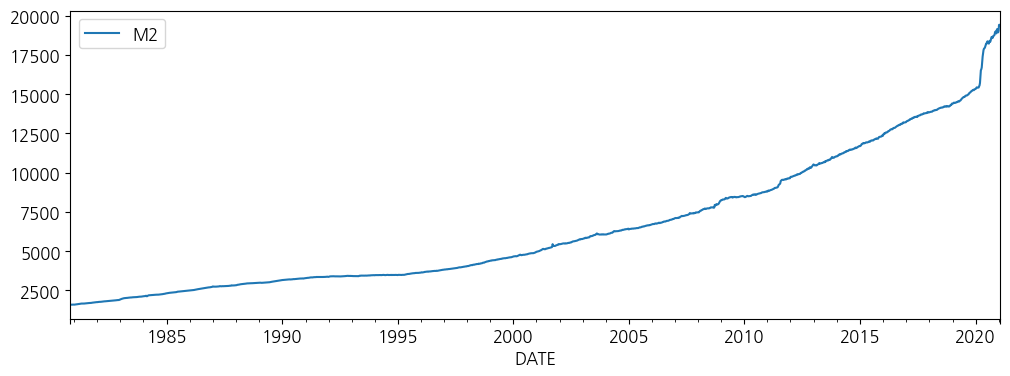

In [135]:
import matplotlib.pyplot as plt
# import datetime as dt

plt.rc('figure', figsize=(12, 4))
plt.rc('font', family='NanumGothic')

# x축에 날짜, y축에 지수를 넣고 간단히 그려봅니다.
# df_m2.plot('DATE', 'M2')
df_m.plot('DATE', 'M2')

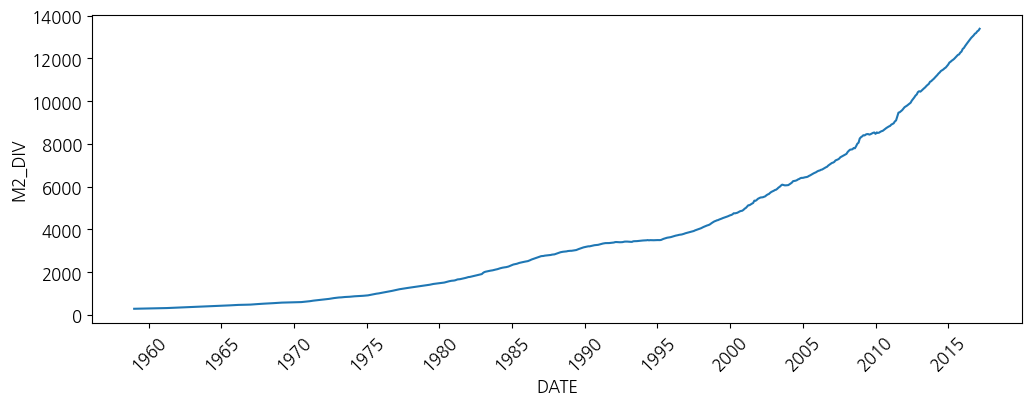

In [96]:
# 리스트 [ ,   ,   ,]
xm = df_m2['DATE'].to_list()
xmlabels = df_m2['DATE'].dt.year.to_list() # 1975, 1975,1975, 1975, 1976....

ym = df_m2['M2_div'].to_list()

plt.plot(xm, ym)

plt.xticks(ticks=xm, labels=xmlabels, rotation=45)
plt.xlabel('DATE')
plt.ylabel('M2_DIV')

plt.locator_params(axis='x', nbins=len(xmlabels)/60)


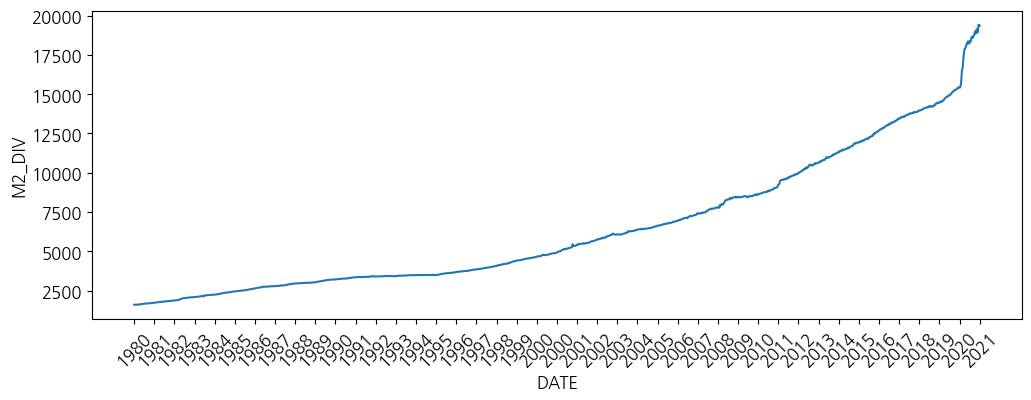

In [147]:
# 리스트 [ ,   ,   ,]
xm2 = df_m['DATE'].to_list()
xmlabels2 = df_m['DATE'].dt.year.to_list() # 1975, 1975,1975, 1975, 1976....

ym2 = df_m['M2'].to_list()

plt.plot(xm2, ym2)

plt.xticks(ticks=xm2, labels=xmlabels2, rotation=45)
plt.xlabel('DATE')
plt.ylabel('M2_DIV')

plt.locator_params(axis='x', nbins=len(xmlabels2)/50)

In [142]:
len(xmlabels2)

2101

In [150]:
import warnings
warnings.filterwarnings("ignore")

# to_datetime() 함수는 inplace = True 라는 인자가 없습니다.

# df_us['Time']
df_m['Time'] = pd.to_datetime(df_m['DATE'])

In [151]:
df_m.info

<bound method DataFrame.info of            DATE       M2       Time
0    1980-11-03   1591.4 1980-11-03
1    1980-11-10   1592.9 1980-11-10
2    1980-11-17   1596.3 1980-11-17
3    1980-11-24   1597.2 1980-11-24
4    1980-12-01   1596.1 1980-12-01
...         ...      ...        ...
2096 2021-01-04  19039.8 2021-01-04
2097 2021-01-11  19411.0 2021-01-11
2098 2021-01-18  19425.0 2021-01-18
2099 2021-01-25  19376.2 2021-01-25
2100 2021-02-01  19370.5 2021-02-01

[2101 rows x 3 columns]>

### M2 & 미국 주택 지수 병합 시각화

In [161]:
# df_merged2 = pd.merge_asof(
#     df_us, df_m2,
#     on='Time', direction='nearest')

df_merged3 = pd.merge_asof(
    df_us, df_m,
    on='Time', direction='nearest')

In [162]:
df_merged3

,DATE_x,USSTHPI,Time,DATE_y,M2
0,1975-01-01,60.03,1975-01-01,1980-11-03,1591.4
1,1975-04-01,60.98,1975-04-01,1980-11-03,1591.4
2,1975-07-01,61.14,1975-07-01,1980-11-03,1591.4
3,1975-10-01,62.22,1975-10-01,1980-11-03,1591.4
4,1976-01-01,62.85,1976-01-01,1980-11-03,1591.4
...,...,...,...,...,...
185,2021-04-01,511.17,2021-04-01,2021-02-01,19370.5
186,2021-07-01,539.60,2021-07-01,2021-02-01,19370.5
187,2021-10-01,558.07,2021-10-01,2021-02-01,19370.5
188,2022-01-01,578.58,2022-01-01,2021-02-01,19370.5


### 결측치 처리

In [166]:
df_merged3.isnull()

,DATE_x,USSTHPI,Time,DATE_y,M2
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
185,False,False,False,False,False
186,False,False,False,False,False
187,False,False,False,False,False
188,False,False,False,False,False


<AxesSubplot:>

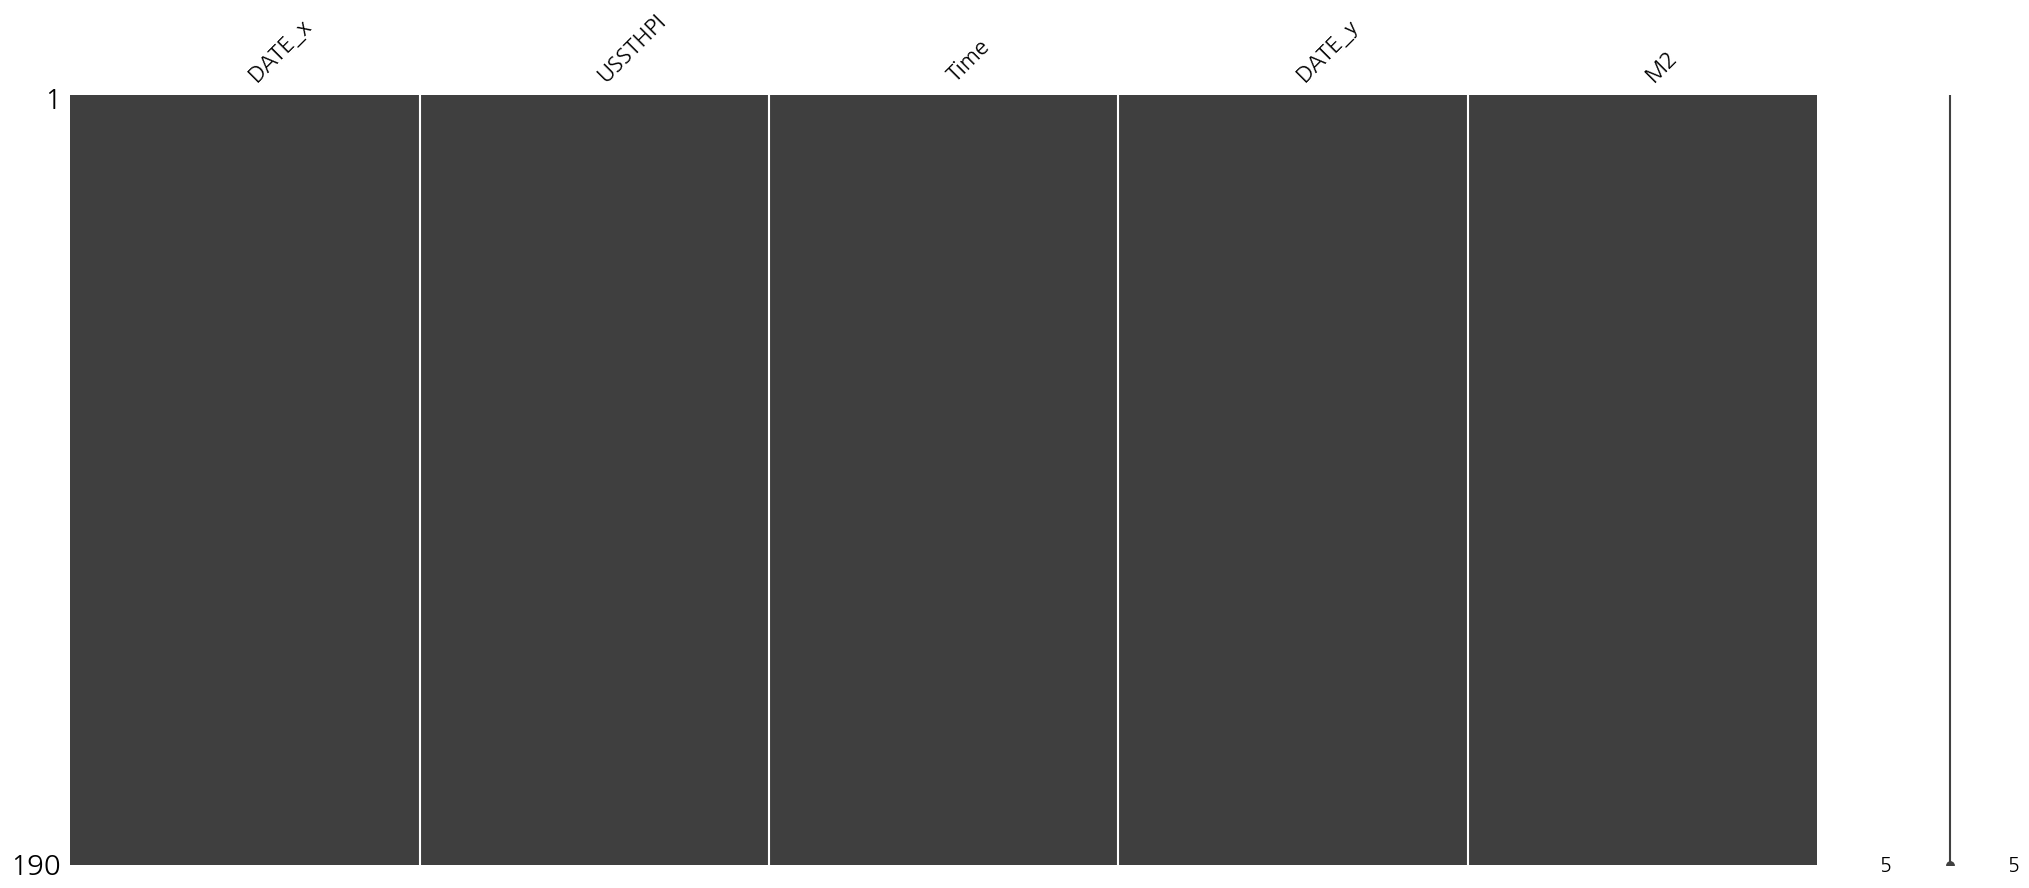

In [167]:
#결측치 시각화
import missingno as msno

# %matplotlib inline # notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해줍니다.
plt.rc('font', family = 'NanumGothic')
msno.matrix(df_merged3)

In [168]:
#결측치 없음
df_merged3.isnull().sum()

DATE_x     0
USSTHPI    0
Time       0
DATE_y     0
M2         0
dtype: int64

In [169]:
df_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE_x   190 non-null    datetime64[ns]
 1   USSTHPI  190 non-null    float64       
 2   Time     190 non-null    datetime64[ns]
 3   DATE_y   190 non-null    datetime64[ns]
 4   M2       190 non-null    float64       
dtypes: datetime64[ns](3), float64(2)
memory usage: 8.9 KB


In [170]:
df_merged3.dropna(inplace=True)
df_merged3

,DATE_x,USSTHPI,Time,DATE_y,M2
0,1975-01-01,60.03,1975-01-01,1980-11-03,1591.4
1,1975-04-01,60.98,1975-04-01,1980-11-03,1591.4
2,1975-07-01,61.14,1975-07-01,1980-11-03,1591.4
3,1975-10-01,62.22,1975-10-01,1980-11-03,1591.4
4,1976-01-01,62.85,1976-01-01,1980-11-03,1591.4
...,...,...,...,...,...
185,2021-04-01,511.17,2021-04-01,2021-02-01,19370.5
186,2021-07-01,539.60,2021-07-01,2021-02-01,19370.5
187,2021-10-01,558.07,2021-10-01,2021-02-01,19370.5
188,2022-01-01,578.58,2022-01-01,2021-02-01,19370.5


In [171]:
# reset_index() 함수에서 drop = True 인자값은 기존 인덱스 칼럼을 삭제하라는 옵션
df_merged3.reset_index(drop=True, inplace=True)

In [172]:
df_merged3

,DATE_x,USSTHPI,Time,DATE_y,M2
0,1975-01-01,60.03,1975-01-01,1980-11-03,1591.4
1,1975-04-01,60.98,1975-04-01,1980-11-03,1591.4
2,1975-07-01,61.14,1975-07-01,1980-11-03,1591.4
3,1975-10-01,62.22,1975-10-01,1980-11-03,1591.4
4,1976-01-01,62.85,1976-01-01,1980-11-03,1591.4
...,...,...,...,...,...
185,2021-04-01,511.17,2021-04-01,2021-02-01,19370.5
186,2021-07-01,539.60,2021-07-01,2021-02-01,19370.5
187,2021-10-01,558.07,2021-10-01,2021-02-01,19370.5
188,2022-01-01,578.58,2022-01-01,2021-02-01,19370.5


In [173]:
# df2 = df_merged2[["Time", "USSTHPI", "M2_div"]]
# df2
df3 = df_merged3[["Time", "USSTHPI", "M2"]]
df3

,Time,USSTHPI,M2
0,1975-01-01,60.03,1591.4
1,1975-04-01,60.98,1591.4
2,1975-07-01,61.14,1591.4
3,1975-10-01,62.22,1591.4
4,1976-01-01,62.85,1591.4
...,...,...,...
185,2021-04-01,511.17,19370.5
186,2021-07-01,539.60,19370.5
187,2021-10-01,558.07,19370.5
188,2022-01-01,578.58,19370.5


In [109]:
# df2.columns = ["Time", "STHPI", "M2_B"]
# df2
# df3.columns = ["Time", "STHPI", "M2_B"]
# df3

,Time,STHPI,M2_B
0,1975-01-01,60.03,906.3
1,1975-04-01,60.98,935.1
2,1975-07-01,61.14,975.1
3,1975-10-01,62.22,997.8
4,1976-01-01,62.85,1026.6
...,...,...,...
185,2021-04-01,511.17,13380.5
186,2021-07-01,539.60,13380.5
187,2021-10-01,558.07,13380.5
188,2022-01-01,578.58,13380.5


### 시각화

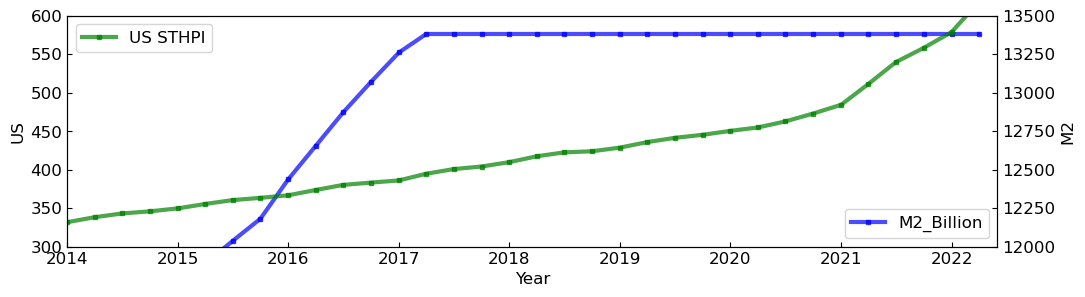

In [129]:
import matplotlib.pyplot as plt
import datetime
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
xm = df2.Time #df.시점 # df['시점']
ym1 = df2.STHPI
ym2 = df2.M2_B

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# y1 : 미국 인덱스에 대한 값
ax1.plot(xm, ym1, '-s', color='green', markersize=3, linewidth=3, alpha=0.7, label='US STHPI')

ax1.set_ylim(300, 600)
ax1.set_xlim(datetime.date(2014,1,1),datetime.date(2022,6,1))
ax1.set_xlabel('Year')
ax1.set_ylabel('US')
ax1.tick_params(axis='both', direction='in')

# y2 : M2 통화량
ax2 = ax1.twinx()
ax2.plot(xm, ym2, '-s', color='blue', markersize=3, linewidth=3, alpha=0.7, label='M2_Billion')

# ax2.bar(x, y2, color='deeppink', label='KR Price', alpha=0.7, width=30)
# ax2.set_ylim(40, 140)

ax2.set_ylim(12000, 13500)
ax2.set_ylabel('M2')
ax2.tick_params(axis='y', direction='in')

# set_zorder() 메서드는 z-축 방향의 순서를 지정합니다.
# 아래 그림과 같이 zorder가 낮을수록 먼저 그려지고(ax2 = 한국), zorder가 높을수록 나중에 그려집니다.(ax1 = 미국)

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.savefig('./data/US_USSTHPI_M2.png')

plt.show()

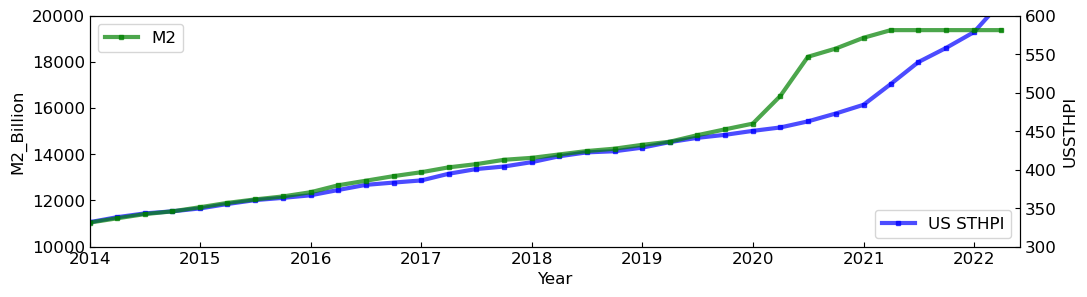

In [178]:
import matplotlib.pyplot as plt
import datetime
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
xm = df3.Time #df.시점 # df['시점']
ym1 = df3.M2
ym2 = df3.USSTHPI

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# y1 : 미국 인덱스에 대한 값
ax1.plot(xm, ym1, '-s', color='green', markersize=3, linewidth=3, alpha=0.7, label='M2')

ax1.set_ylim(10000, 20000)
ax1.set_xlim(datetime.date(2014,1,1),datetime.date(2022,6,1))
ax1.set_xlabel('Year')
ax1.set_ylabel('M2_Billion')
ax1.tick_params(axis='both', direction='in')

# y2 : M2 통화량
ax2 = ax1.twinx()
ax2.plot(xm, ym2, '-s', color='blue', markersize=3, linewidth=3, alpha=0.7, label='US STHPI')

# ax2.bar(x, y2, color='deeppink', label='KR Price', alpha=0.7, width=30)
# ax2.set_ylim(40, 140)

ax2.set_ylim(300, 600)
ax2.set_ylabel('USSTHPI')
ax2.tick_params(axis='y', direction='in')

# set_zorder() 메서드는 z-축 방향의 순서를 지정합니다.
# 아래 그림과 같이 zorder가 낮을수록 먼저 그려지고(ax2 = 한국), zorder가 높을수록 나중에 그려집니다.(ax1 = 미국)

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.savefig('./data/US_USSTHPI_M2_2022.png')

plt.show()